# Лабораторная работа №2

##### Светлаковой Ульяны и Суриковой Дарьи 4-ПМИ 2 подгр.

[Теория](https://docs.google.com/document/d/1Khv71agZmVo9vHlb0Z0vP0mR6RJb-toULYJ15gapkk8/edit?usp=sharing)

Решим задачу нахождения кратчайшего по времени пути между двумя точками $x_0$ и $x_1$.
$$F(l)=\int_{l(x_0, x_1)} {|dx|\over c(x)}$$

$c(x)$ - скорость звука в неоднородной среде.

$$\dot{x}={dx\over dt}\ \Rightarrow\ |dx|=|\dot{x}|dt$$

$$F=\int_0^T {|\dot{x}|dt\over c(x(t))}$$

Уравнение Эйлера
$$L_y- {d\over dy}L_{y'}=0$$

Лагранжиан:  
$$L = n(x)|\dot{x}|$$  
где  
$$n(x) = {1\over c(x)}$$

Выберем параметризаицию такую, что $$n(x)|\dot{x}| = 1$$

Уравнение лучей примет вид:

$${d\over dt}(n^2(x)\dot{x})={\nabla n(x)\over n(x)}$$

Это система второго порядка, запишем её в виде системы первого порядка, обозначив
$$p = n^2(x)\dot{x}$$

Коэффициент преломления и его производная:

$$n(y) = \frac{1}{1 + p_0 y^2}$$

Производная коэффициента преломления:

$$n'(y) = -\frac{2 p_0 y}{(1 + p_0 y^2)^2}$$

Решаем систему:

$$
\begin{cases}
  {dx\over dt} = {p(t)\over n^2(y)}\\
  {dy\over dt} = {q(t)\over n^2(y)}\\
  {dp\over dt} = 0\\
  {dq\over dt} = {n'(y)\over n(y)}
\end{cases}\,
$$

$$
\begin{cases}
  p^2+q^2=n^2\\
  x_0=0\\
  y_0=0\\
  p_0=\sin{45}\\
  q_0=\cos{45}
\end{cases}\,
$$

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [19]:
# Функция коэффициента преломления n(y)
def n(y, p0):
    return 1 / (1 + p0 * y**2)

def n_derivative(y, p0):
    return -2 * p0 * y / (1 + p0 * y**2)**2

In [20]:
# Система дифференциальных уравнений
def ray_system(t, z, p0):
    x, y, p, q = z
    nx = n(y, p0)
    d_x = p / nx**2
    d_y = q / nx**2
    d_p = 0
    d_q = n_derivative(y, p0) / nx
    return [d_x, d_y, d_p, d_q]

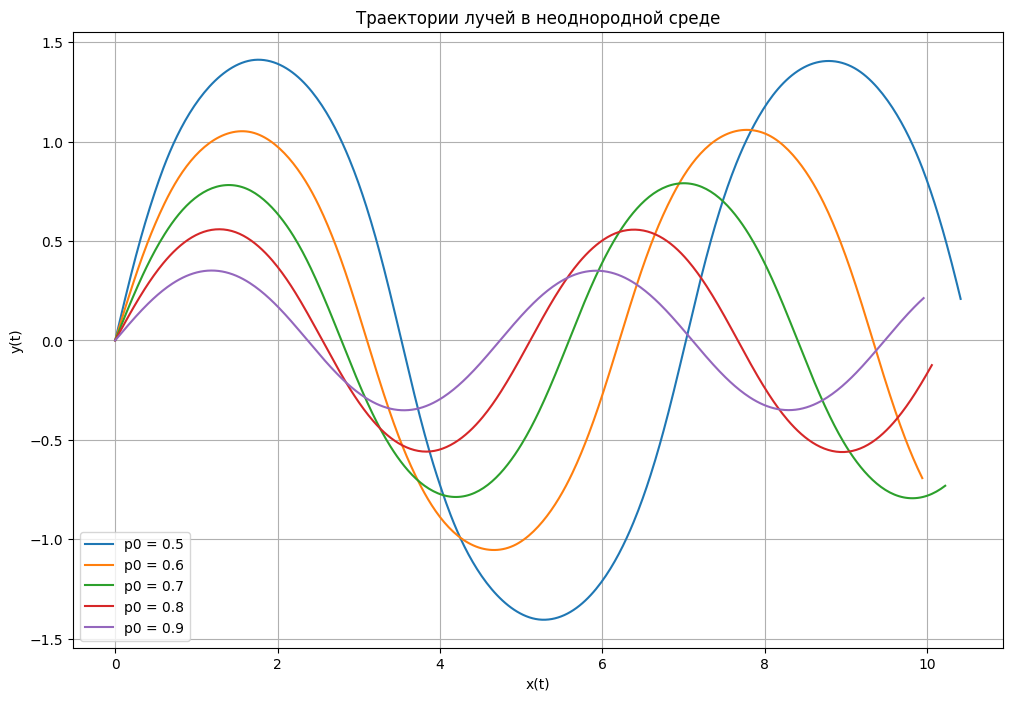

In [21]:
p0_values = [0.5, 0.6, 0.7, 0.8, 0.9]

plt.figure(figsize=(12, 8))

for p0 in p0_values:
    q0 = np.sqrt(n(0, p0)**2 - p0**2) / n(0, p0)
    initial_conditions = [0, 0, p0, q0]
    t_span = (0, 10)
    t_eval = np.linspace(0, 10, 500)

    # Решение задачи Коши методом Рунге-Кутта
    solution = solve_ivp(ray_system, t_span, initial_conditions, t_eval=t_eval, method='RK45', args=(p0,))

    plt.plot(solution.y[0], solution.y[1], label=f'p0 = {p0}')

plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Траектории лучей в неоднородной среде')
plt.legend()
plt.grid()
plt.show()

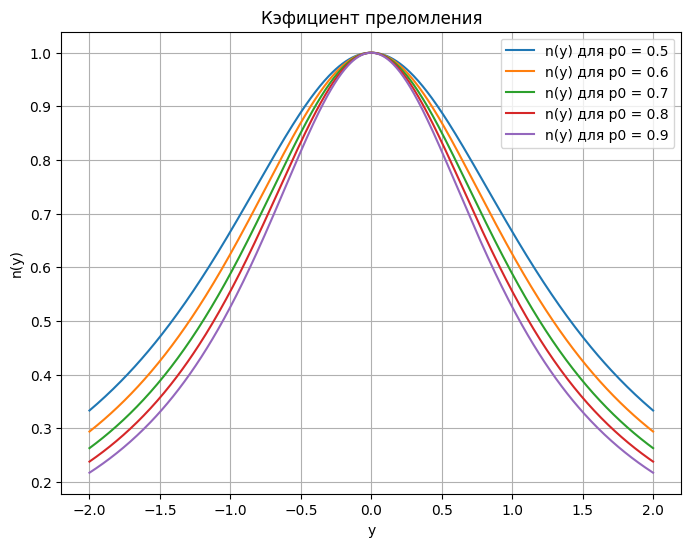

In [ ]:
plt.figure(figsize=(8, 6))

y_values = np.linspace(-2, 2, 500)
for p0 in p0_values:
    n_values = n(y_values, p0)
    plt.plot(y_values, n_values, label=f'n(y) для p0 = {p0}')

plt.xlabel('y')
plt.ylabel('n(y)')
plt.title('Кэфициент преломления')
plt.legend()
plt.grid()
plt.show()